In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/samples_cancer.csv')

In [4]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



===== Kernel: LINEAR =====
Accuracy       : 0.9610
Recall         : 0.9583
Precision      : 0.9324
F1-Score       : 0.9452
Jaccard        : 0.8961
Error Rate     : 0.0390
Confusion Matrix:
[[128   5]
 [  3  69]]

===== Kernel: POLY =====
Accuracy       : 0.9463
Recall         : 0.8889
Precision      : 0.9552
F1-Score       : 0.9209
Jaccard        : 0.8533
Error Rate     : 0.0537
Confusion Matrix:
[[130   3]
 [  8  64]]

===== Kernel: RBF =====
Accuracy       : 0.9610
Recall         : 0.9583
Precision      : 0.9324
F1-Score       : 0.9452
Jaccard        : 0.8961
Error Rate     : 0.0390
Confusion Matrix:
[[128   5]
 [  3  69]]

===== Kernel: SIGMOID =====
Accuracy       : 0.9463
Recall         : 0.9167
Precision      : 0.9296
F1-Score       : 0.9231
Jaccard        : 0.8571
Error Rate     : 0.0537
Confusion Matrix:
[[128   5]
 [  6  66]]


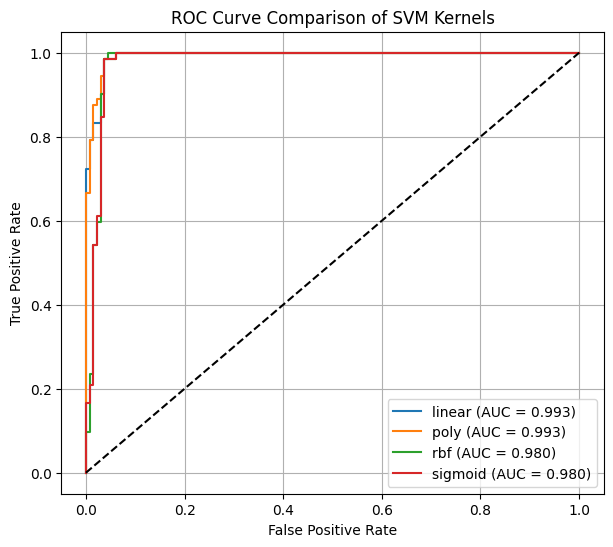

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt


df = pd.read_csv("/content/samples_cancer.csv")  # replace with your filename

df = df.drop('ID', axis=1)

df = df[df['BareNuc'] != '?']
df['BareNuc'] = df['BareNuc'].astype(int)

X = df.drop('Class', axis=1)
y = df['Class']

y = y.map({2: 0, 4: 1})


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    svm = SVC(kernel=k, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jac = jaccard_score(y_test, y_pred)
    err = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    results[k] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1,
        "Jaccard": jac,
        "Error Rate": err,
        "Confusion Matrix": cm,
        "y_prob": y_prob
    }


for k, metrics in results.items():
    print(f"\n===== Kernel: {k.upper()} =====")
    for metric, value in metrics.items():
        if metric != "y_prob" and metric != "Confusion Matrix":
            print(f"{metric:15s}: {value:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")


plt.figure(figsize=(7,6))
for k in kernels:
    fpr, tpr, _ = roc_curve(y_test, results[k]["y_prob"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{k} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison of SVM Kernels")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
